In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
img = cv2.imread("/content/golgeli.jpeg",0)
img_resized = cv2.resize( img, (1000, 600) )

image = cv2.medianBlur(img_resized, ksize=5)

th2= cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,17,21)

Canny = cv2.Canny(th2,100,200)


contours,_ = cv2.findContours(Canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


for cnt in contours :
    (x,y,w,h) = cv2.boundingRect(cnt)
    area = cv2.contourArea(cnt)
    aspectRatio = float(w) / float(h)
    extent = area / float(w*h)
    perimeter = cv2.arcLength(cnt, True)

    print("perimeter"+ str(perimeter))
    print("area"+ str(area))
    print("h"+ str(h))
    print("w"+ str(w))

    cv2.drawContours(th2,[cnt],-1,(255,0,0),3)
    shape=""
    if extent < 0.80 :
        if 1.19 < aspectRatio <1.23 :
            shape = "Circle"
        elif area - (area * 5/ 100) <= (w * h / 2) <= area + (area * 5/ 100):
            shape = "Triangle"
        elif area - (area * 20 / 100) <=  5.1961 * ((perimeter / 6)**2) / 2 <= area + (area * 30 / 100):
            shape = "Hexagon"
        elif area - (area * 25 / 100) <= ( (perimeter / 5) * (h/2) / (2 * 5 ))  <= area + (area * 35 / 100):
            shape = "Pentagon"


    elif aspectRatio <= 1.70:
         shape = "Rectangle"





    cv2.putText(th2, shape, (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 100, 170), 2)
    print("Contour #{}, extent={:.2f}".format(cnt + 1, extent))
    cv2.drawContours(th2, cnt, -1, (0, 0, 255), 2)





perimeter633.2132030725479
area24808.5
h145
w176
Contour #[[[472 367]]

 [[471 368]]

 [[470 368]]

 ...

 [[475 367]]

 [[474 367]]

 [[473 367]]], extent=0.97
perimeter692.9259679317474
area31680.0
h186
w229
Contour #[[[807 327]]

 [[806 328]]

 [[805 328]]

 ...

 [[810 328]]

 [[809 328]]

 [[808 328]]], extent=0.74
perimeter898.9747383594513
area35412.0
h204
w347
Contour #[[[223 307]]

 [[222 308]]

 [[221 308]]

 ...

 [[226 309]]

 [[225 308]]

 [[224 308]]], extent=0.50
perimeter666.5168067216873
area17746.5
h158
w224
Contour #[[[762  68]]

 [[761  69]]

 [[760  69]]

 ...

 [[765  70]]

 [[764  69]]

 [[763  69]]], extent=0.50
perimeter729.5533845424652
area37295.0
h198
w242
Contour #[[[163  30]]

 [[162  31]]

 [[161  31]]

 ...

 [[166  30]]

 [[165  30]]

 [[164  30]]], extent=0.78
perimeter802.3056915998459
area39727.5
h232
w264
Contour #[[[479   9]]

 [[478  10]]

 [[477  10]]

 ...

 [[482   9]]

 [[481   9]]

 [[480   9]]], extent=0.65
perimeter4.0
area0.0
h1
w3
Contour

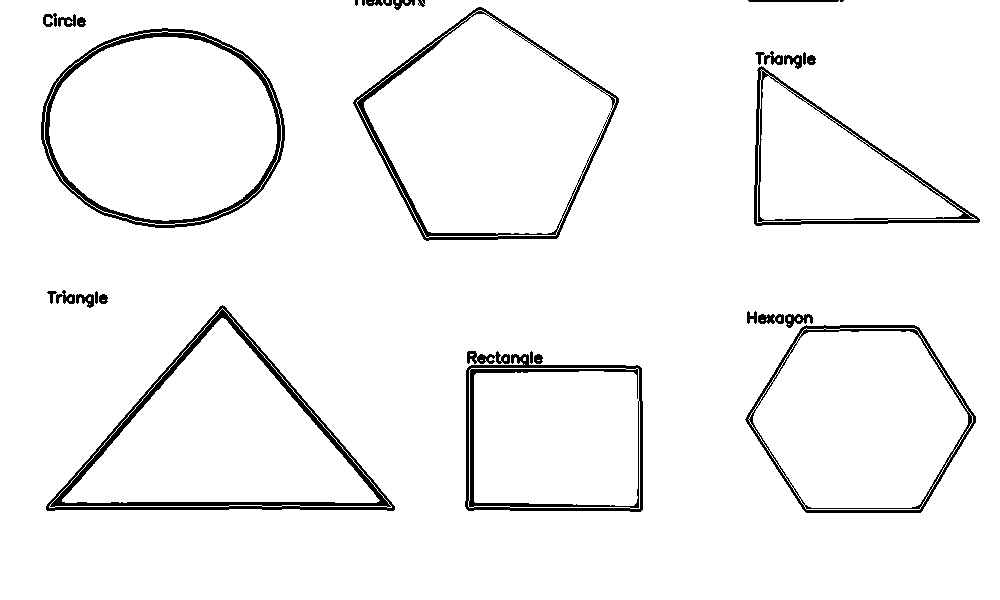

In [146]:
cv2_imshow(th2)

In [ ]:
cv2.imwrite("save_img.png", img)

True